# Utilizando o modelo Inception pré-treinado

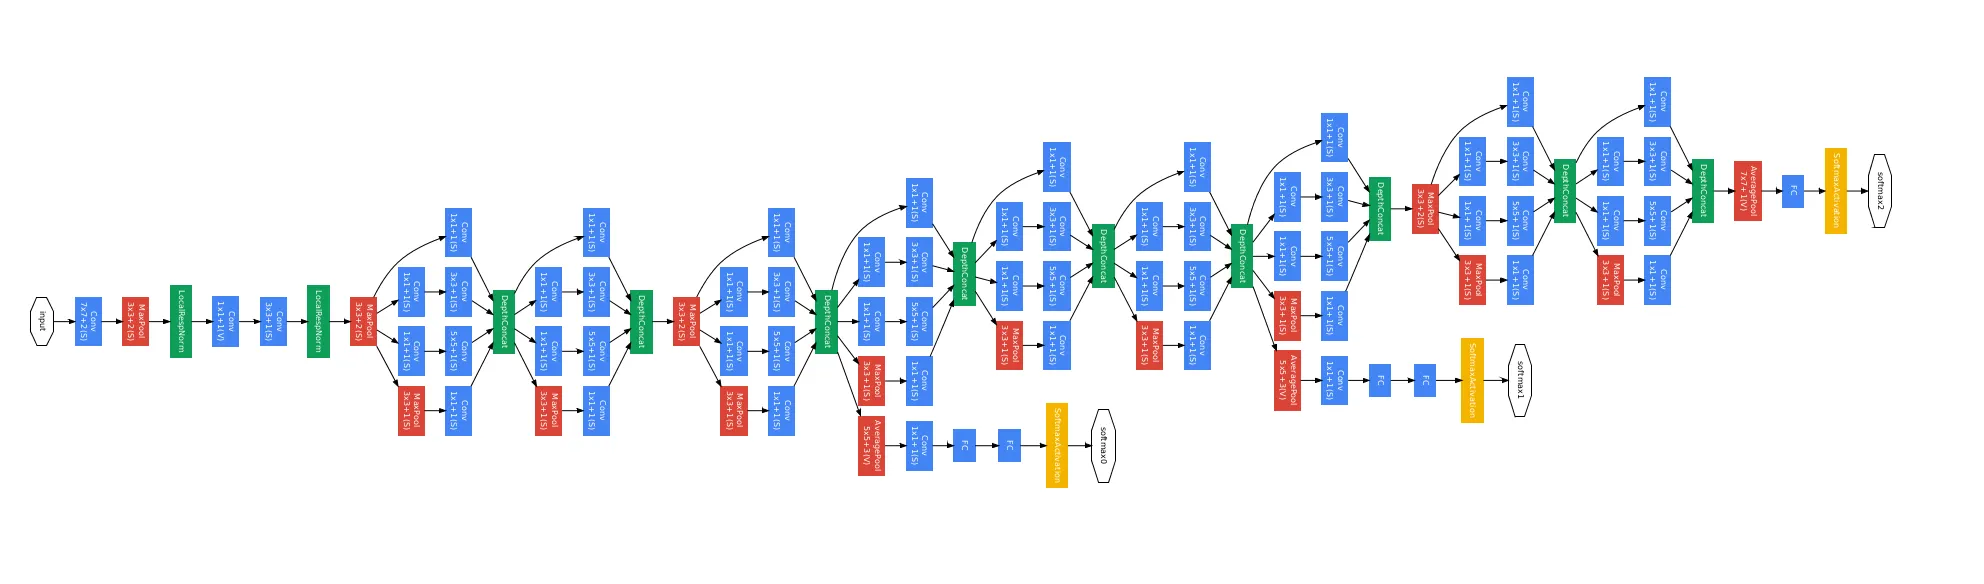

Motivação - A arquitetura LeNet utilizava convoluções 5x5, a AlexNet utilizava convoluções 3x3, 5x5 e 11x11, e a VGG utilizava uma combinação diferente de convoluções 3x3 e 5x5. Mas a questão que preocupava os cientistas da área de deep learning era qual combinação de convoluções utilizar em diferentes conjuntos de dados para obter os melhores resultados.

Por exemplo, se escolhermos convoluções 5x5, acabamos com um número razoável de parâmetros, há muito mais multiplicações envolvidas e elas precisam de muitos parâmetros e são muito lentas, mas, por outro lado, são muito expressivas. Mas se escolhermos convoluções 1x1, elas são muito mais rápidas e não precisam de muita memória, mas talvez não funcionem tão bem. Tendo essas questões em mente, uma ideia brilhante foi proposta no artigo do Google LeNet — por que não escolher todas elas e empilhá-las em vários blocos convolucionais? Ele também é chamado de artigo Inception, baseado no filme Inception e seu famoso diálogo — “precisamos ir mais fundo” (https://arxiv.org/abs/1409.4842).

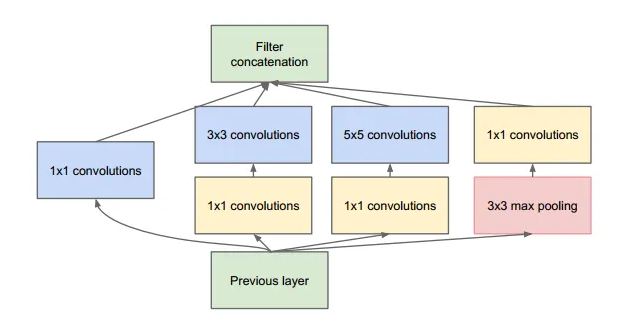

Ele tem convoluções 1x1 seguidas por convoluções 3x3, tem convoluções 1x1 seguidas por convoluções 5x5, tem uma camada de pool máximo 3x3 seguida por convoluções 1x1 e tem uma única convolução 1x1. A ideia é que, se usarmos todas as convoluções e pooling em um bloco, algumas delas serão eficientes o suficiente para extrair informações significativas das imagens. Para garantir que as dimensões da imagem sejam mantidas, as convoluções 3x3 têm um preenchimento de 1 e a camada 5x5 tem um preenchimento de 2, de modo que as imagens de entrada e saída tenham o mesmo tamanho. E, finalmente, todas elas são empilhadas juntas.


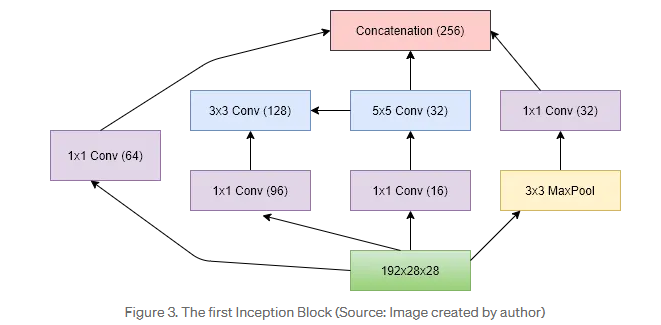

O número de filtros em cada camada nos blocos Inception é projetado de forma a obtermos o número desejado de canais como saída para o próximo bloco. Por exemplo, no primeiro bloco Inception, conforme mostrado na Figura, o número total de canais soma 256. Note que, cada bloco pode ao final alterar o número de canais para mais ou menos. Tendo em vista criar mais feature maps.

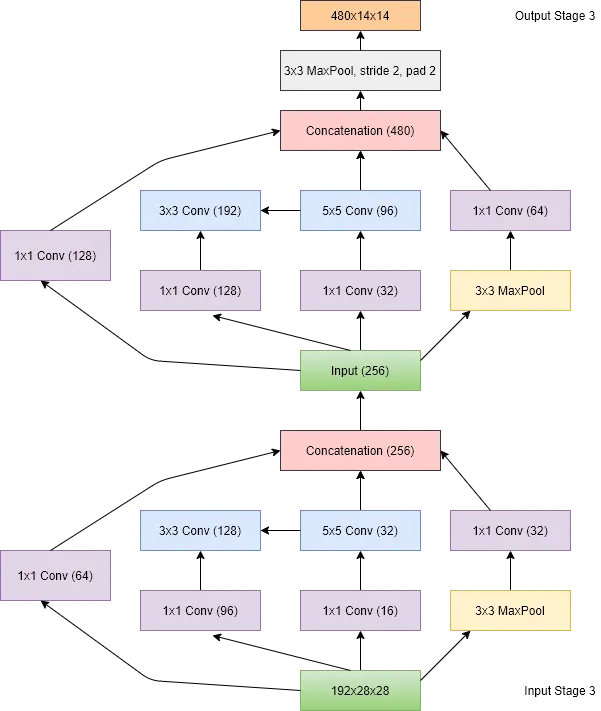

Os blocos Inception são projetados de forma a exigir menos parâmetros e menos complexidade computacional do que uma única camada convolucional 3x3 ou 5x5, conforme mostrado na Tabela 1. Se tivéssemos 256 canais na camada de saída, o Inception precisaria apenas de 16.000 parâmetros e custaria apenas 128 Mega FLOPS, enquanto uma camada convolucional 3x3 precisaria de 44.000 parâmetros e custaria 346 Mega FLOPS, e uma camada convolucional 5x5 precisaria de 1.220.000 parâmetros e custaria 963 Mega FLOPS. Portanto, os blocos Inception, essencialmente, realizam o mesmo trabalho que camadas convolucionais únicas, com muito melhor eficiência de memória e computação.

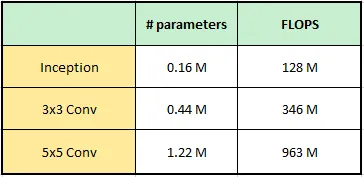

## Com a versão 2 do inception, foi acrescentado Batch Normalization.
## Com a versão 3, foi modificado o bloco Inception no stage 4 e stage 5. 

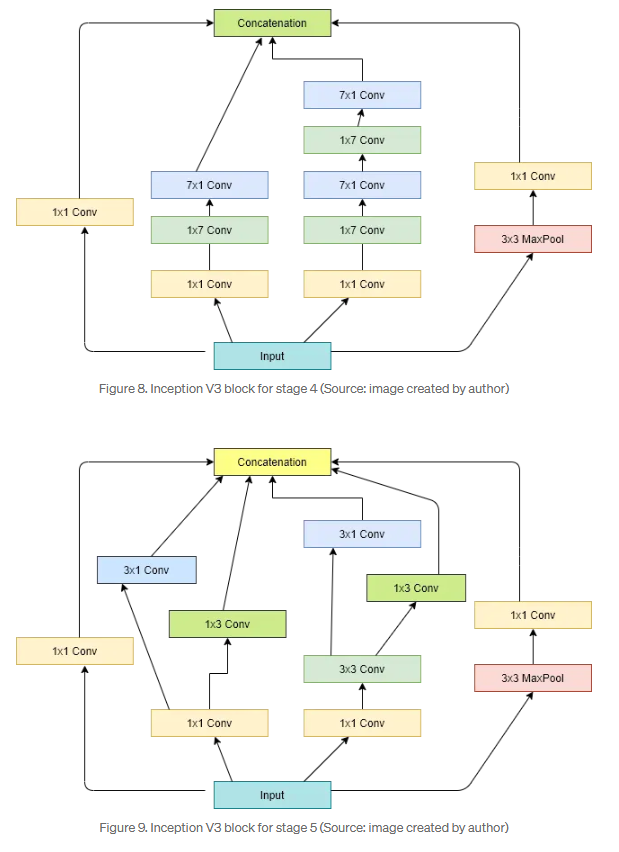

## E finalmente, na versão 4 do Inception, foi acrescentado o conceito de residuo das ResNets no artigo (https://arxiv.org/abs/1602.07261)

## Iremos utilizar o modelo pré-treinado do InceptionV3 disponível no PyTorch.

In [3]:
import torchvision.models as models
import torch

model = models.inception_v3(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [4]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [5]:
model.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [6]:

import json
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open('imageNetclasses.json') as f:
  class_names = json.load(f)


def predict_image(images, class_names):
    to_pil = transforms.ToPILImage()
    fig=plt.figure(figsize=(16,16))

    for (i,image) in enumerate(images):
      # Convert to image and tensor
      image = to_pil(image)
      image_tensor = test_transforms(image).float()
      image_tensor = image_tensor.unsqueeze_(0)
      input = Variable(image_tensor)
      input = input.to(device)
      output = model(input)
      index = output.data.cpu().numpy().argmax()
      name = class_names[str(index)]
      
      # Plot image
      sub = fig.add_subplot(len(images),1, i+1)
      sub.set_title(f'Predicted {str(name)}')
      plt.axis('off')
      plt.imshow(image)
    plt.show()

data_dir = './images'

test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      #transforms.Normalize([0.485, 0.456, 0.406],
                                       #                   [0.229, 0.224, 0.225])
                                     ])

In [7]:
def get_images(directory='./images'):
    data = datasets.ImageFolder(directory, transform=test_transforms)
    num_images = len(data)
    loader = torch.utils.data.DataLoader(data, batch_size=num_images)
    dataiter = iter(loader)
    images, labels = next(dataiter)
    images, labels = images.to('cuda'), labels.to('cuda')
    return images

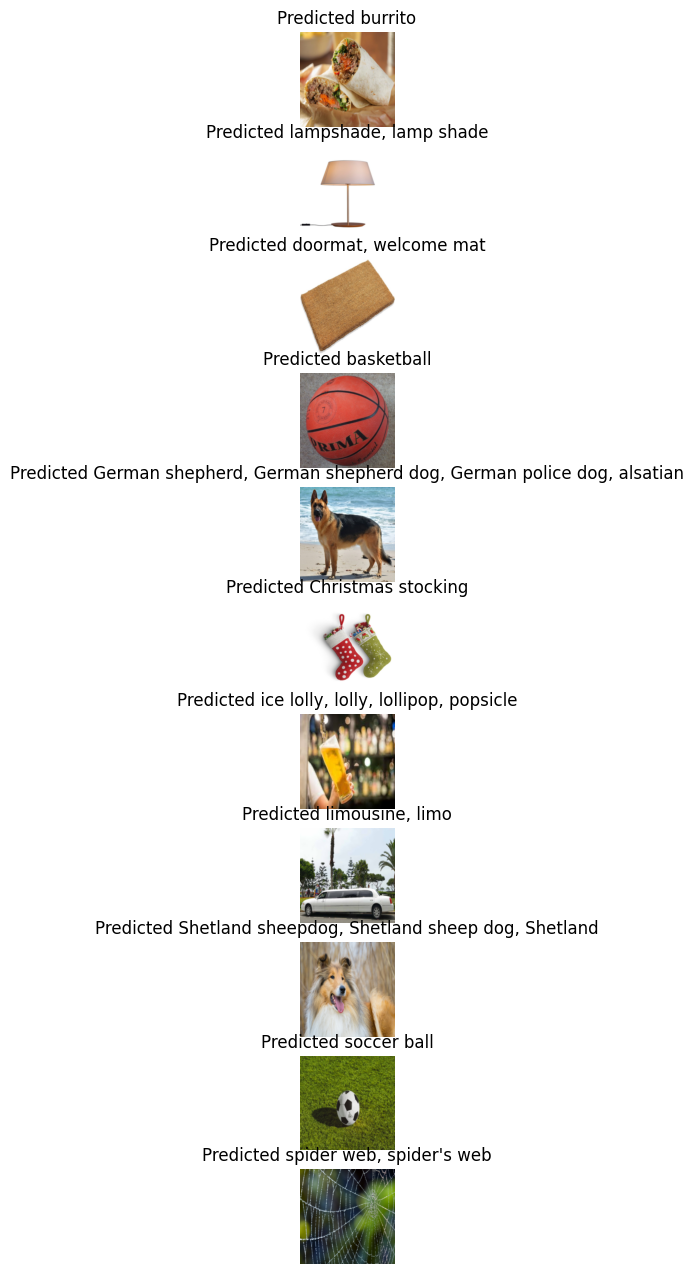

In [8]:
images = get_images('./images')
predict_image(images, class_names)